In [73]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Question 1
In LSTM model, why sigmoid or tanh are used? Can we use ReLU to replace tanh?


Exploding and Vanishing Gradient

# Question 2
For the HW2 CIFAR-10 Base Model (provided in attached Jupyter Notebook file), let’s fix the epochs = 10. Please modify the model structure to improve the model performance based on the tips we discussed in DL 10 (target: test error lower then 0.25 in 10 epochs training). Discuss your approach.


In [185]:
# You don't need to change this session
um_classes = 10
input_shape = (32, 32, 3)

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

print("x_train shape: {} - y_train shape: {}".format(X_train.shape,y_train.shape))
print("x_test shape: {} - y_test shape: {}".format(X_test.shape,y_test.shape))

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, um_classes)
y_test = keras.utils.to_categorical(y_test, um_classes)

x_train shape: (50000, 32, 32, 3) - y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3) - y_test shape: (10000, 1)


In [4]:
# customized model 
inputs = keras.Input(shape=(32, 32, 3))

x=layers.Conv2D(32, kernel_size=(3, 3))(inputs)
x=layers.Activation("relu")(x)
x=layers.MaxPooling2D(pool_size=(2, 2))(x)
x=layers.Conv2D(64, kernel_size=(3, 3))(x)
x=layers.Activation("relu")(x)
x=layers.MaxPooling2D(pool_size=(2, 2))(x)
x=layers.Flatten()(x)

outputs=layers.Dense(um_classes, activation="softmax")(x)

In [5]:
model_customized=keras.Model(inputs,outputs)
model_customized.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_customized.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 13, 13, 64)        0         
                                                             

In [6]:
history = model_customized.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
1250/1250 [==============================] - 30s 23ms/step - loss: 1.5095 - accuracy: 0.4600 - val_loss: 1.3016 - val_accuracy: 0.5385
Epoch 2/10
1250/1250 [==============================] - 29s 23ms/step - loss: 1.1777 - accuracy: 0.5902 - val_loss: 1.1064 - val_accuracy: 0.6173
Epoch 3/10
1250/1250 [==============================] - 28s 23ms/step - loss: 1.0410 - accuracy: 0.6405 - val_loss: 1.0683 - val_accuracy: 0.6364
Epoch 4/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.9558 - accuracy: 0.6695 - val_loss: 0.9883 - val_accuracy: 0.6626
Epoch 5/10
1250/1250 [==============================] - 25s 20ms/step - loss: 0.8957 - accuracy: 0.6905 - val_loss: 0.9777 - val_accuracy: 0.6673
Epoch 6/10
1250/1250 [==============================] - 34s 27ms/step - loss: 0.8447 - accuracy: 0.7111 - val_loss: 0.9909 - val_accuracy: 0.6579
Epoch 7/10
1250/1250 [==============================] - 30s 24ms/step - loss: 0.8068 - accuracy: 0.7234 - val_loss: 0.9583 -

In [7]:
score = model_customized.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test error:", 1-score[1])

Test loss: 0.9651193618774414
Test error: 0.31849998235702515


In [186]:
# customized model 
inputs = keras.Input(shape=(32, 32, 3))

x=layers.Conv2D(64, kernel_size=(3, 3),kernel_initializer='he_normal')(inputs)
x=layers.Activation("relu")(x)
x=layers.BatchNormalization()(x)
#x=layers.Dropout(0.1)(x)
x=layers.MaxPooling2D(pool_size=(2, 2))(x)
x=layers.Conv2D(128, kernel_size=(3, 3),kernel_initializer='he_normal')(x)
x=layers.Activation("relu")(x)
x=layers.BatchNormalization()(x)
#x=layers.Dropout(0.1)(x)
x=layers.Conv2D(128*2, kernel_size=(3, 3),kernel_initializer='he_normal')(x)
x=layers.Activation("relu")(x)
x=layers.BatchNormalization()(x)
x=layers.Conv2D((128*2)*2, kernel_size=(3, 3),kernel_initializer='he_normal')(x)
x=layers.Activation("relu")(x)
x=layers.BatchNormalization()(x)
x=layers.Conv2D((128*2)*4, kernel_size=(3, 3),kernel_initializer='he_normal')(x)
x=layers.Activation("relu")(x)
x=layers.BatchNormalization()(x)
#x=layers.Dropout(0.1)(x)
x=layers.MaxPooling2D(pool_size=(2, 2))(x)
x=layers.Flatten()(x)
x=layers.Dense((128*2)*4, activation='relu')(x)
x=layers.Dense((128*2)*2, activation='relu')(x)
x=layers.Dense(128*2, activation='relu')(x)
x=layers.Dense(128, activation='relu')(x)
x=layers.Dense(64, activation='relu')(x)
x=layers.Dense(32, activation='relu')(x)


outputs=layers.Dense(um_classes, activation="softmax")(x)

In [187]:
model_customized=keras.Model(inputs,outputs)
model_customized.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_customized.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_46 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 activation_46 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 batch_normalization_29 (Bat  (None, 30, 30, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 13, 13, 128)       738

In [188]:
history = model_customized.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/10
313/313 [==============================] - 2256s 7s/step - loss: 1.5892 - accuracy: 0.4296 - val_loss: 2.1598 - val_accuracy: 0.3444
Epoch 2/10
313/313 [==============================] - 2749s 9s/step - loss: 1.0890 - accuracy: 0.6191 - val_loss: 1.0291 - val_accuracy: 0.6500
Epoch 3/10
313/313 [==============================] - 2622s 8s/step - loss: 0.8787 - accuracy: 0.6981 - val_loss: 0.8906 - val_accuracy: 0.6984
Epoch 4/10
313/313 [==============================] - 2930s 9s/step - loss: 0.7286 - accuracy: 0.7516 - val_loss: 0.8564 - val_accuracy: 0.7054
Epoch 5/10
313/313 [==============================] - 2818s 9s/step - loss: 0.6000 - accuracy: 0.7966 - val_loss: 0.9221 - val_accuracy: 0.6957
Epoch 6/10
313/313 [==============================] - 2806s 9s/step - loss: 0.4810 - accuracy: 0.8375 - val_loss: 0.7857 - val_accuracy: 0.7580
Epoch 7/10
313/313 [==============================] - 2812s 9s/step - loss: 0.3804 - accuracy: 0.8717 - val_loss: 0.7905 - val_accuracy:

In [189]:
score = model_customized.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test error:", 1-score[1])

Test loss: 1.0632281303405762
Test error: 0.2565000057220459


# Question 3

In [99]:
df=pd.read_csv('/Users/czamiela/Library/CloudStorage/OneDrive-Personal/Industrial Engineering/DeepLearningOptimization/DL HW3/jena_climate_2009_01.csv')

In [142]:
print(df.shape)
future=144
past=df.shape[0]-(future*2)
print(past)
df.head()

(4464, 15)
4176


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:00:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
3,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
4,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0


In [162]:
training_set = df.iloc[:past, [ 1,2, 5, 7, 8, 10, 11]].values
test_set = df.iloc[past:,[ 1,2, 5, 7, 8, 10, 11]].values
print(training_set.shape)
print(test_set.shape)
pd.DataFrame(training_set).head()

(4176, 7)
(288, 7)


,0,1,2,3,4,5,6
0,996.52,-8.02,93.3,3.11,0.22,3.12,1307.75
1,996.52,-8.02,93.3,3.11,0.22,3.12,1307.75
2,996.57,-8.41,93.4,3.02,0.21,3.03,1309.80
3,996.53,-8.51,93.9,3.01,0.20,3.02,1310.24
4,996.51,-8.31,94.2,3.07,0.19,3.08,1309.19


In [163]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(future, past):
    X_train.append(training_set_scaled[i-future:i, [0,2,3,4,5,6]])
    y_train.append(training_set_scaled[i, 1])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 6))
#y_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)
print(X_train.shape)
print(y_train.shape)

(4032, 144, 6)
(4032,)


In [164]:
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 144, 6)]          0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                4992      
                                                                 
 dense_56 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


In [170]:
# Fitting the RNN to the Training set
history=model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
126/126 [==============================] - 4s 35ms/step - loss: 0.0016
Epoch 2/100
126/126 [==============================] - 4s 31ms/step - loss: 0.0010
Epoch 3/100
126/126 [==============================] - 4s 28ms/step - loss: 7.1798e-04
Epoch 4/100
126/126 [==============================] - 4s 30ms/step - loss: 5.7148e-04
Epoch 5/100
126/126 [==============================] - 4s 29ms/step - loss: 4.3958e-04
Epoch 6/100
126/126 [==============================] - 4s 29ms/step - loss: 3.6049e-04
Epoch 7/100
126/126 [==============================] - 4s 29ms/step - loss: 2.9686e-04
Epoch 8/100
126/126 [==============================] - 4s 29ms/step - loss: 2.6663e-04
Epoch 9/100
126/126 [==============================] - 4s 30ms/step - loss: 2.5453e-04
Epoch 10/100
126/126 [==============================] - 4s 30ms/step - loss: 2.1998e-04
Epoch 11/100
126/126 [==============================] - 4s 29ms/step - loss: 2.0682e-04
Epoch 12/100
126/126 [===========================

In [177]:
X_test=[]
y_test=[]
test_set=sc.transform(test_set)
for i in range(future, future*2):
    X_test.append(test_set[i-future:i, [0,2,3,4,5,6]])
    y_test.append(test_set[i, 1])
X_test = np.array(X_test)
y_test = np.array(y_test).reshape(144,1)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 6))
#y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1]))
print(X_test.shape)
print(y_test.shape)

(144, 144, 6)
(144, 1)


In [178]:
#X_test=test_set[:,[0,2,3,4,5,6]].reshape(144,144,6)
#y_test=test_set[:,1].reshape(144,144,1)
y_pred=model.predict(X_test)
y_pred.shape

(144, 1)

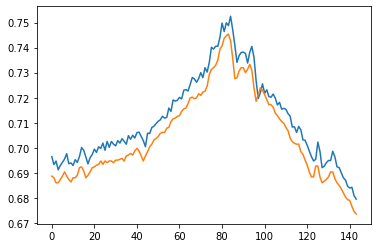

In [181]:
plt.plot(y_pred)
plt.plot(y_test)
plt.show()